Tamaño de paso 'h': 0.05

   i    |  t[i]   |           y[i]            |           y[i+1]          |       SOL. Exacta         |      ERROR REL. RK4       | ERROR ABS. RK4 
-------------------------------------------------------------------------------------------------------------------------------------------------
   0    |   0.0   |           0.0             |  0.00012390976442177133  |  0.00012393400842600262   |  0.00019562027032929644   | 2.4244004231287935e-08
   1    |  0.05   |  0.00012390976442177133   |  0.00048598260902268627  |  0.00048631869247398485   |  0.0006910765646059596    | 3.360834512985836e-07
   2    |   0.1   |  0.00048598260902268627   |   0.001060340537353259   |  0.0010619895152298169    |   0.001552725194467692    | 1.6489778765578673e-06
   3    |  0.15   |   0.001060340537353259    |  0.0018073370815837489   |   0.001812425891902355    |   0.00280773428659466     | 5.088810318606149e-06
   4    |   0.2   |  0.0018073370815837489    |   0.00267603778370

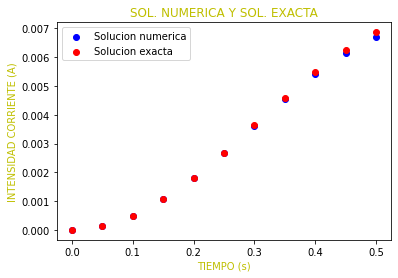

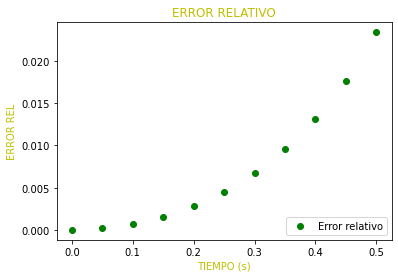

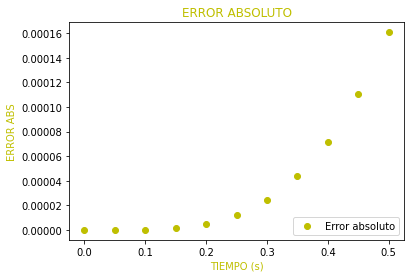

El tiempo de ejecucion en segundos fue: 1.325925588607788


In [ ]:
"PROGRAMA PARA CALCULAR LA CORRIENTE I(t) UTILIZANDO METODO RK4"
"################## RK4 ECUACION DIFERENCIAL DE SEGUNDO ORDEN ########################"

import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import sin
from sympy import cos
from time import time

def solucionexacta(t,y):
      ec = (-62/15401)*cos(5*t) + (5/30802)*sin(5*t) + (62/15401)*(math.e**(-0.1*t))*cos((math.sqrt(19))*t*(1/10))  -  ((0.02045)/(5*(math.sqrt(19))))*(math.e**(-0.1*t))*sin((math.sqrt(19))*t*(1/10))  # solucion exacta encontrado en https://es.symbolab.com/solver/
      return ec                                                                                                                                                                                           
def derivada2(t,y,u):
      ec = (0.5/5)*cos(t*5)-(1/5)*u-y
      return ec   

h = float(input("Tamaño de paso 'h': "))
print('')
tiempo_inicial = time()                       # inicio conteo de tiempo
s = 0.5                                       # Tiempo final - Tiempo inicial  
n = int((s/h)+1)                               
t = np.zeros(n)                               # Matrices de ceros
x = np.zeros(n)
y = np.zeros(n)
u = np.zeros(n)
w = np.zeros(n)
z4 = np.zeros(n)
z44 = np.zeros(n)
t[0]=0                                        # Valores iniciales
y[0]=0
u[0]=0
w[0]=0
print('{:^7} | {:^7} | {:^24}  |  {:^24} | {:^24}  | {:^24}  | {:^15}'.format('i','t[i]','y[i]','y[i+1]','SOL. Exacta', 'ERROR REL. RK4', 'ERROR ABS. RK4'))
print("-------------------------------------------------------------------------------------------------------------------------------------------------")
for i in np.arange(1,n):

    m1=u[i-1]                                                                         # Codigo e iteraciones RK4, EDO 2do orden .
    k1=derivada2(t[i-1],y[i-1],u[i-1])
    m2=u[i-1]+(h/2)*k1
    k2=derivada2(t[i-1] + h/2 ,y[i-1] + (h/2)*m1 ,u[i-1] + (h/2)*k1)
    m3=u[i-1]+(h/2)*k2
    k3=derivada2(t[i-1] + h/2 ,y[i-1] + (h/2)*m2 ,u[i-1] + (h/2)*k2)
    m4=u[i-1]+h*k3
    k4=derivada2(t[i-1] + h ,y[i-1] + h*m3 ,u[i-1] + h*k3)
    y[i]=y[i-1] + (h/6)*(m1+2*m2+2*m3+m4)
    u[i]=u[i-1] + (h/6)*(k1+2*k2+2*k3+k4)
    t[i]=round(t[i-1] + h,3)
    w[i]=solucionexacta(t[i],y[i])
    z4[i]=abs((w[i]-y[i])/w[i])                             #ERROR RELATIVO RK4
    z44[i]=abs(w[i]-y[i])                                   #ERROR ABSOLUTO RK4

    print('{:^7} | {:^7} | {:^24}  | {:^24} | {:^24}  | {:^24}  | {:^15}'.format(i-1,t[i-1],y[i-1],y[i],w[i],z4[i],z44[i]))
   
plt.scatter(t,y,color='blue',label="Solucion numerica")
plt.scatter(t,w,color='red',label="Solucion exacta")
plt.title('SOL. NUMERICA Y SOL. EXACTA' , color = 'y')
plt.xlabel('TIEMPO (s)', color = 'y')
plt.ylabel('INTENSIDAD CORRIENTE (A)', color = 'y')
plt.legend()
plt.show()

plt.scatter(t,z4,color='green',label="Error relativo")
plt.title('ERROR RELATIVO' , color = 'y')
plt.xlabel('TIEMPO (s)', color = 'y')
plt.ylabel('ERROR REL', color = 'y')
#plt.ylim(2e-6,3e-6)  # para un h=0.025, este ylim se ajusta dependiendo del valor h
plt.legend(loc=4)
plt.show()

plt.scatter(t,z44,color='y',label="Error absoluto")
plt.title('ERROR ABSOLUTO' , color = 'y')
plt.xlabel('TIEMPO (s)', color = 'y')
plt.ylabel('ERROR ABS', color='y')
plt.legend(loc=4)
plt.show()

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print ('El tiempo de ejecucion en segundos fue:',tiempo_ejecucion) # fin conteo de tiempo

 